# Seminari 2 - Graph Wars

---

**Assignatura**: Anàlisi de Grafs i Cerca d'Informació

**Grau**: Enginyeria de Dades

**Concepte**: Seminari pràctic que engloba exercicis dels temes 6 i 7

**Descripció de l'activitat**: La majoria coneixem la saga de La Guerra de les Galàxies. Per a qui no ho conegui, és una saga de pel·licules de ciencia ficció creada per George Lucas. Els esdeveniments de Star Wars tenen lloc en una galàxia fictícia de nom desconegut i en un temps no especificat. A més de l'espècie humana, hi són descrits molts tipus d'espècies extraterrestres procedents dels nombrosos planetes i satèl·lits que formen la galàxia. Altres personatges recurrents són els robots i els androides. Els grafs que us proposem d'utilitzar en aquest exercici representen els personatges de la saga en els nodes, i la seva co-aparició en una escena (els pesos de les arestes són més alts si dos personatges apareixen simultàniement més vegades). Per tant, tenim una xarxa social de personatges. Utilitzarem aquests grafs per treballar algunes de les operacions vistes relacionades amb detecció de comunitats i difusió en grafs.

## Avaluació

---

**Lliurament final**: Petita memòria en PDF, en format lliure, amb la resposta a les diferents preguntes. Així doncs, la memòria serà una anàlisi de la xarxa a nivell d'agrupaments. La memòria pot incloure les línies de codi clau en cas que ho considereu necessari, tot i que no s'avaluarà la programació, sinó com s'ha solucionat el problema i el raonament que en feu. Tot i que es proporcionen moltes eines de visualitzacio, recoreu que podeu generar els resultats en format text si us és útil per a la memòria o us és més còmode.

**Forma de lliurament**: Per e-mail a Josep.Llados@uab.cat o Pau.Riba@cvc.uab.cat i poseu com a Assumpte "**[AG] Seminari 2**".

**Data màxima de lliurament**: Dilluns dia 2 de Desembre (inclòs).


## Obtenció de les dades

---

Podem triar si volem treballar amb dades provinents de tota la saga o d'episodis concrets en el següent enllaç: [Star Wars Social Networks](https://github.com/evelinag/star-wars-network-data).

```
@misc{gabasova_star_wars_2016,
  author  = {Evelina Gabasova},
  title   = {{Star Wars social network}},
  year    = 2016,
  url     = {https://doi.org/10.5281/zenodo.1411479},
  doi     = {10.5281/zenodo.1411479}
 }
```

En aquest enllaç podeu seleccionar els fitxers *.json* que vulgueu utilitzar. Per descarregar les dades a l'entorn *colab* podeu executar la següent comanda:

```
$ !wget https://raw.githubusercontent.com//evelinag/star-wars-network-data/master/file_id.json
```

on,

* **file_id** és l'identificador del fitxer que podeu trobar amb el link. Aquest indica el número de pel·licula en la saga.

Per exemple, per descarregar el graf de la primera pel·licula, executariem:

```
$ !wget https://raw.githubusercontent.com/evelinag/star-wars-network-data/master/starwars-episode-4-interactions-allCharacters.js
```

Els fitxers descarregats els podem trobar a */content/file_name*.

In [0]:
!wget https://raw.githubusercontent.com/evelinag/star-wars-network-data/master/starwars-episode-5-interactions-allCharacters.json

--2019-12-01 18:59:26--  https://raw.githubusercontent.com/evelinag/star-wars-network-data/master/starwars-episode-5-interactions-allCharacters.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5528 (5.4K) [text/plain]
Saving to: ‘starwars-episode-5-interactions-allCharacters.json.1’

starwars-episode-5- 100%[===================>]   5.40K  --.-KB/s    in 0s      

2019-12-01 18:59:26 (75.7 MB/s) - ‘starwars-episode-5-interactions-allCharacters.json.1’ saved [5528/5528]



## Llegir les dades


---


Per llegir les dades farem servir dues llibreries de Python molt conegudes:

* [NetworkX](https://networkx.github.io/)
* [JSON](https://docs.python.org/3/library/json.html)

*json_graph()* crea un graf amb la llibreria NetworkX a partir del fitxer *.json* descarregat.

In [0]:
import networkx as nx
import json

def json_graph(file_id: str) -> nx.graph:
    with open(file_id) as json_file:
        data = json.load(json_file)
        for i in range(len(data['links'])):
            data['links'][i]['value'] = 1/data['links'][i]['value']
        return nx.Graph(nx.readwrite.json_graph.node_link_graph(data))
    raise NameError(f"Unable to read the graph {file_id}")

* **Creació del graf que volgueu treballar:**

In [0]:
g = json_graph('/content/starwars-episode-5-interactions-allCharacters.json')

* ***Familiaritzeu-vos amb el graf***

Name: 
Type: Graph
Number of nodes: 21
Number of edges: 55
Average degree:   5.2381


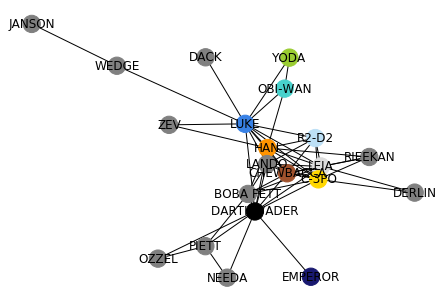

In [0]:
print(nx.info(nx.Graph(g)))
nx.draw(g, pos=nx.spring_layout(g), labels=dict(g.nodes(data='name')), node_color=list(dict(g.nodes(data='colour')).values()))

## Operacions i mesures de grafs relacionades amb detecció de comunitats

---




* ***Mesures bàsiques de clustering i densitat***

In [0]:
density = nx.density(g)
avg_clustering = nx.average_clustering(g)
print(f"Density {density}")
print(f"Clustering {avg_clustering}")

Density 0.2619047619047619
Clustering 0.628581735724593


* ***Trobeu els maximal cliques***

El graph te 15 cliques maximals


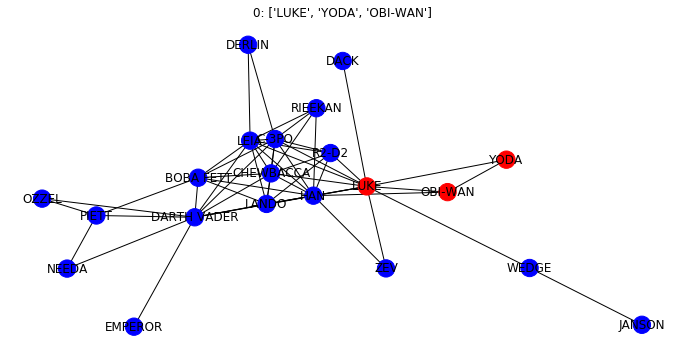

In [0]:
%matplotlib inline
import time
from matplotlib import animation, rc
import matplotlib.pyplot as plt

total_cliques = len(list(nx.find_cliques(g)))# Numero total de cliques maximals
print(f"El graph te {total_cliques} cliques maximals")

color = g.number_of_nodes()*['b']

fig, ax = plt.subplots(figsize=(12,6))
cliques = list(nx.find_cliques(g)) # Feu una llista de cliques maximals (llista amb els corresponents indexs)

pos = nx.spring_layout(g)

def update(idx):   
    ax.clear()

    col = color.copy()
    title = []
    for i in cliques[idx]:
        col[i] = 'r'
        title.append(g.nodes[i]['name'])

    ax.set_title(f"{idx}: {title}")
    return nx.draw(g, pos=pos, labels=dict(g.nodes(data='name')), node_color=col)

anim = animation.FuncAnimation(fig, update, frames=len(cliques), interval=1000, repeat=True)

# Note: below is the part which makes Animation work on Colab
rc('animation', html='jshtml')
anim

In [0]:
list(nx.k_core(g))

[0, 1, 2, 3, 5, 6, 12, 19, 20]

* ***Trobeu el número de core de cada node i dibuixeu el graf amb tots els cores i el K-core mes gran***

The cores per each node is {0: 6, 1: 6, 2: 6, 3: 6, 4: 4, 5: 6, 6: 6, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 6, 13: 1, 14: 1, 15: 1, 16: 2, 17: 1, 18: 2, 19: 6, 20: 6}
The largest core is 6


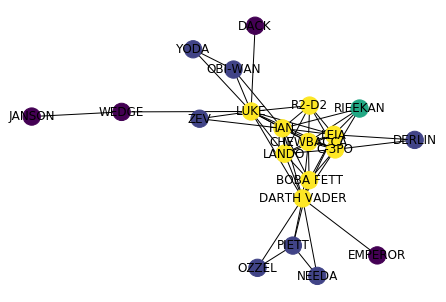

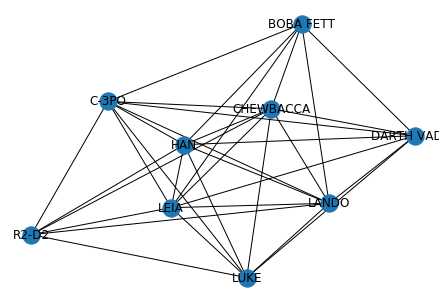

In [0]:
node_core = nx.core_number(g) # Dictionary {id: core}
max_core = max(node_core.values()) # Mida del core mes gran

print(f"The cores per each node is {node_core}")
print(f"The largest core is {max_core}")

nx.draw(g, labels=dict(g.nodes(data='name')), node_color=list(node_core.values()))
plt.show()
kc = nx.k_core(g, max_core) # Kcore mes gran
nx.draw(kc, pos=nx.spring_layout(kc), labels=dict(kc.nodes(data='name')))

## Detecció de Comunitats


---

Realitzeu un estudi sobre les comunitats de la xarxa que esteu treballant. A continuacio us proporcionem una funció anomenada *community_layout()* on donat un graf i una partició, us troba les posicions dels nodes perquè les comunitats estiguin separades en el dibuix.

In [0]:
# Code borrowed from: https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx/43541777

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

Exemple d'un algorisme de clustering basat en modularitat

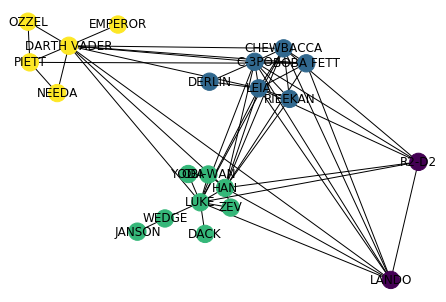

In [0]:
import community
partition = community.best_partition(g, weight='value')
pos = community_layout(g, partition)
nx.draw(g, pos, node_color=list(partition.values()), labels=dict(g.nodes(data='name')))

### Agglomerative clustering


---

Es va proposar com a exercici en el notebook del tema 6. No s'inclou obligatòriament en aquest seminari, però si s'implementa un algorisme de clustering aglomeratiu, es tindrà en compte en la nota com a puntuació extra.

Recordeu que els algorismes aglomeratius són algorismes de "baix cap a dalt", és a dir, que parteixen de tots els nodes separats, i a cada pas d'iteració fusionen els dos nodes (o clusters) més "propers". Aquesta fusió pot ser amb *single linkage*, *complete linkage* o *average linkage*.

Veure apunts del tema 6 (pàgines 26-30).


### Divisive Clustering



---


* ***Feu servir l'algorisme de Girvan-Newman per tal de buscar comunitats en el graf proporcionat.***

In [0]:
from networkx.algorithms import community

* Sense tenir en compte el pes de les arestes

In [0]:
communities_generator = nx.community.centrality.girvan_newman(g) # Apliqueu l'algorismee de Girvan Newman per trobar comunitats

In [0]:
list(communities_generator)

[({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20},
  {14, 15}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17, 18, 19, 20},
  {13},
  {14, 15}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 18, 19, 20},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 16, 19, 20},
  {8, 18},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 9, 12, 19, 20},
  {8, 18},
  {10, 11, 16},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 7, 12, 19, 20},
  {8, 18},
  {9},
  {10, 11, 16},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 12, 19, 20},
  {7},
  {8, 18},
  {9},
  {10, 11, 16},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 5, 6, 12, 19, 20},
  {4},
  {7},
  {8, 18},
  {9},
  {10, 11, 16},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 5, 6, 12, 19, 20},
  {4},
  {7},
  {8, 18},
  {9},
  {10, 16},
  {11},
  {13},
  {14, 15},
  {17}),
 ({0, 1, 2, 3, 5, 6, 19, 20},
  {4},
  {7},
  {8, 18},
  {9},
  {10, 16},
  {11},
  {12},
  {13},
  {14, 15},

In [0]:
g.edges.data()

EdgeDataView([(0, 1, {'value': 0.2}), (0, 6, {'value': 0.1}), (0, 2, {'value': 0.14285714285714285}), (0, 3, {'value': 0.25}), (0, 5, {'value': 0.2}), (0, 20, {'value': 1.0}), (1, 3, {'value': 0.05263157894736842}), (1, 6, {'value': 0.047619047619047616}), (1, 2, {'value': 0.2}), (1, 5, {'value': 0.05263157894736842}), (1, 4, {'value': 1.0}), (1, 20, {'value': 0.1111111111111111}), (1, 12, {'value': 1.0}), (1, 19, {'value': 1.0}), (2, 3, {'value': 0.25}), (2, 8, {'value': 0.5}), (2, 6, {'value': 1.0}), (2, 5, {'value': 1.0}), (2, 13, {'value': 0.3333333333333333}), (2, 14, {'value': 0.5}), (2, 9, {'value': 1.0}), (2, 18, {'value': 0.2}), (2, 12, {'value': 0.5}), (2, 20, {'value': 0.5}), (3, 4, {'value': 0.3333333333333333}), (3, 5, {'value': 0.030303030303030304}), (3, 6, {'value': 0.037037037037037035}), (3, 8, {'value': 1.0}), (3, 9, {'value': 1.0}), (3, 20, {'value': 0.14285714285714285}), (3, 12, {'value': 0.5}), (3, 19, {'value': 1.0}), (4, 5, {'value': 0.25}), (4, 6, {'value': 1.

* Considerant el pes de les arestes

In [0]:
def most_valuable_edge(G):
    g2 = G.copy()
    edges = list(g2.edges)
    edgeValues = list(g2.edges.data())
    values = []
    for i in (edgeValues):
      values.append(i[2]["value"])
    return edges[values.index(max(values))]
communities_generator = nx.community.centrality.girvan_newman(g, most_valuable_edge)# Apliqueu l'algorismee de Girvan Newman per trobar comunitats

In [0]:
list(communities_generator)

[({0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
  {9}),
 ({0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20},
  {7},
  {9}),
 ({0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20},
  {7},
  {9},
  {16}),
 ({0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 18, 19, 20},
  {7},
  {9},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 14, 15, 18, 19, 20},
  {7},
  {8},
  {9},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 18, 19, 20},
  {7},
  {8},
  {9},
  {14, 15},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 12, 13, 18, 19, 20},
  {7},
  {8},
  {9},
  {11},
  {14, 15},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 12, 13, 18, 19, 20},
  {7},
  {8},
  {9},
  {11},
  {14},
  {15},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 12, 18, 19, 20},
  {7},
  {8},
  {9},
  {11},
  {13},
  {14},
  {15},
  {16},
  {17}),
 ({0, 1, 2, 3, 4, 5, 6, 10, 12, 18, 20},
  {7},
  {8},
  {9},
  {11},
  {13},
  {14},
  {15},
  {16},
  {17},

* Seleccioneu el generador corresponent (tenint o no en compte el pes de les arestes) per poder veure l'animació corresponent.

NameError: ignored

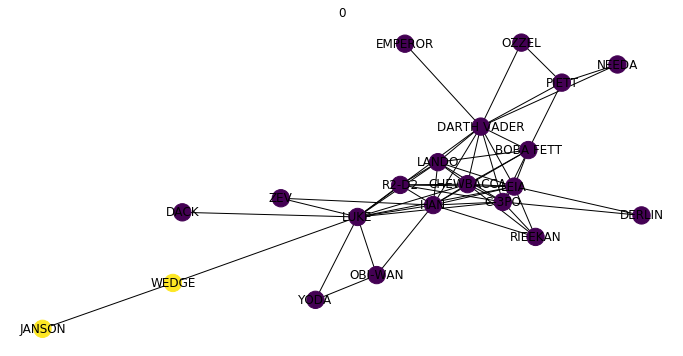

In [0]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(12,6))

pos = nx.spring_layout(g)

communities = list(nx.community.centrality.girvan_newman(g)) # Get the communities from the corresponding generator (sense pes)

def update(idx):   
    ax.clear()

    com = communities[idx]

    label = len(g)*[0]
    partition = dict()
    for i, c in enumerate(com):
        for j in c:
            label[j] = i
            partition[j] = i

    ax.set_title(f"{idx}")

    return nx.draw(g, pos=pos, labels=dict(g.nodes(data='name')), node_color=label)

anim = animation.FuncAnimation(fig, update, frames=len(communities), interval=500, repeat=True)

# Note: below is the part which makes it work on Colab
rc('animation', html='jshtml')
anim

* ***Busqueu l'aresta a tallar segons l'algorisme de Min-Cut***

*   Elemento de lista
*   Elemento de lista



The edges to cut are [('DARTH VADER', 'EMPEROR')]


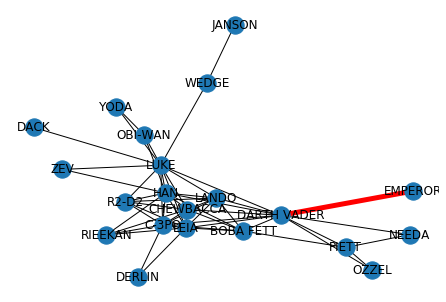

In [0]:

g0 = g.copy()
cut= nx.minimum_edge_cut(g0) # Aresta a tallar
print(f"The edges to cut are {[(g.nodes[n1]['name'], g.nodes[n2]['name']) for n1, n2 in cut]}")

pos = nx.spring_layout(g)
nx.draw(g, pos=pos, labels=dict(g.nodes(data='name')), edgelist=[e for e in g.edges() if e not in cut and (e[1], e[0]) not in cut])
nx.draw_networkx_edges(g, pos, edgelist=cut, edge_color='r', width=5.)